In [ ]:
%ls

drive/  sample_data/


In [ ]:
#%cd '/content/drive/MyDrive/BT_AI/Tuan/'

/content/drive/MyDrive/BT_AI/Tuan


In [ ]:
from os import listdir
from numpy import asarray,save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
folder = '/content/drive/MyDrive/AI/3KhuonMat/'
folder1 = '/content/drive/MyDrive/AI/Test3KhuonMat/'
X_train, y_train = list(),list()
X_test, y_test = list(),list()
for file in listdir(folder):
  output = 0.
  if file.startswith('Thinh'):
    output = 1.0
  if file.startswith('Hung'):
    output = 2.0
  photo = load_img(folder+file,target_size=(150,150))
  photo = img_to_array(photo)
  X_train.append(photo)
  y_train.append(output)
X_train = asarray(X_train)
y_train= asarray(y_train)
for file in listdir(folder1):
  output = 0.
  if file.startswith('Thinh'):
    output = 1.0
  if file.startswith('Hung'):
    output = 2.0
  photo = load_img(folder1+file,target_size=(150,150))
  photo = img_to_array(photo)
  X_test.append(photo)
  y_test.append(output)
X_test = asarray(X_test)
y_test= asarray(y_test)
print("X_test",X_test.shape,'và y_test',y_test.shape)
print('X_train',X_train.shape,'và y_train',y_train.shape)
save('X_test.npy',X_test)
save('y_test.npy',y_test)
save('X_train.npy',X_train)
save('y_train.npy',y_train)

X_test (87, 150, 150, 3) và y_test (87,)
X_train (330, 150, 150, 3) và y_train (330,)


/content/drive/MyDrive/BT_AI/Thinh


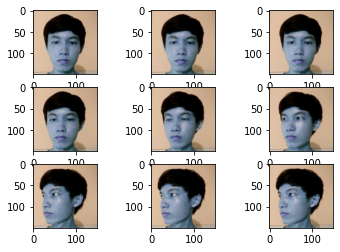

In [ ]:
#BỎ#Tạo dữ liệu và hiển thị 1 số dữ liệu
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
X_train = [i for i in range (0,120)]
y_train = [i for i in range (0,120)]
X_test = [i for i in range (0,40)]
y_test = [i for i in range (0,40)]
for i in range (0,60):
  X_train[i] = cv2.imread('Tuan_'+str(i+1)+'.jpg')
  X_train[i] = cv2.resize(X_train[i],(150,150))
  y_train[i] = 1

for i in range (0,20):
  X_test[i] = cv2.imread('Tuan_'+str(i+61)+'.jpg')
  X_test[i] = cv2.resize(X_test[i],(150,150))
  y_test[i] = 1
%cd '/content/drive/MyDrive/BT_AI/Thinh/'
for i in range (0,60):
  X_train[i+60] = cv2.imread('Thinh_'+str(i+1)+'.jpg')
  X_train[i+60] = cv2.resize(X_train[i+60],(150,150))
  y_train[i+60] = 0

for i in range (0,20):
  X_test[i+20] = cv2.imread('Thinh_'+str(i+61)+'.jpg')
  X_test[i+20] = cv2.resize(X_test[i+20],(150,150))
  y_test[i+20] = 0
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
for i in range (9):
  plt.subplot(330+i+1)# 330 là 3 hàng 3 cột 0 là vị trí
  plt.imshow(X_train[i])
plt.show()

In [ ]:
#BỎ
from google.colab import drive
drive.mount('/content/drive')

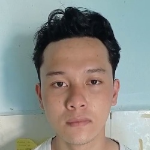

In [ ]:
cv2_imshow(X_train[100])

In [ ]:
#Xử lý dữ liệu
X_train = X_train.reshape(330,67500)
X_test = X_test.reshape(87,67500)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255

In [ ]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train,3)
y_test=np_utils.to_categorical(y_test,3)

In [ ]:
#Khai báo các thư viện cần thiết, tạo model và training
import matplotlib.pyplot as plt 
from keras.layers import Dense, Activation, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
model = Sequential()
model.add (Dense(2000,kernel_initializer='normal',activation = 'relu',input_shape=(67500,)))
model.add (Dense(2000,activation = 'relu'))
model.add (Dense(2000,activation = 'relu'))
model.add (Dense(2000,activation = 'relu'))
model.add (Dense(3,activation = 'softmax'))
model.summary()
#Biên dịch và training
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=30, batch_size=32, validation_data=(X_test,y_test),verbose=1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 2000)              135002000 
                                                                 
 dense_26 (Dense)            (None, 2000)              4002000   
                                                                 
 dense_27 (Dense)            (None, 2000)              4002000   
                                                                 
 dense_28 (Dense)            (None, 2000)              4002000   
                                                                 
 dense_29 (Dense)            (None, 3)                 6003      
                                                                 
Total params: 147,014,003
Trainable params: 147,014,003
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
11/11 [======================

In [ ]:
score = model.evaluate (X_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 1.92651145880518e-06
Test accuracy: 1.0


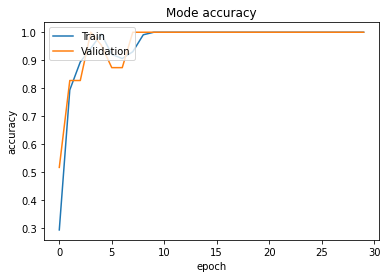

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Mode accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.show()

[[2.7218907e-09 4.6013304e-09 1.0000000e+00]]


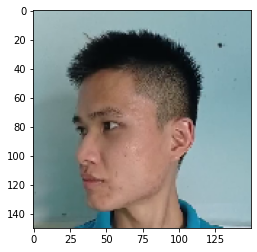

In [ ]:
y_pred = model.predict(X_test[50].reshape(1,67500))
plt.imshow(X_test[50].reshape(150,150,3))
print(y_pred)

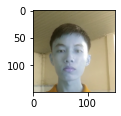

Kết quả nhận dạng:  Tuấn


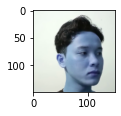

Kết quả nhận dạng:  Thịnh


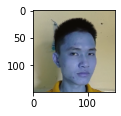

Kết quả nhận dạng:  Hưng


In [ ]:
#Kiểm tra nhận dạng
import cv2
import numpy as np
tuan = cv2.imread('Tuan.jpg')
tuan = cv2.resize(tuan,(150,150))
thinh = cv2.imread('Thinh.jpg')
thinh = cv2.resize(thinh,(150,150))
hung = cv2.imread('Hung.jpg')
hung = cv2.resize(hung,(150,150))
L = [tuan,thinh,hung]
NhanDang =  ['Tuấn','Thịnh','Hưng']
img = asarray(L)
img.shape
img = img.reshape(3,67500)
img = img.astype('float32')
img/=255
y_pred = model.predict(img)
for i in range (3):
  plt.figure(figsize=(1.5,1.5))
  plt.imshow(img[i].reshape(150,150,3))
  plt.show()
  print('Kết quả nhận dạng: ',NhanDang[np.argmax(y_pred[i])])

In [ ]:
%cd ..

/content
